In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


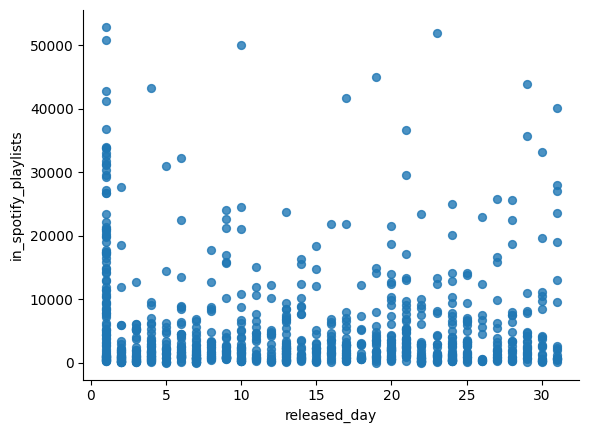

In [37]:
data.plot(kind='scatter', x='released_day', y='in_spotify_playlists', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

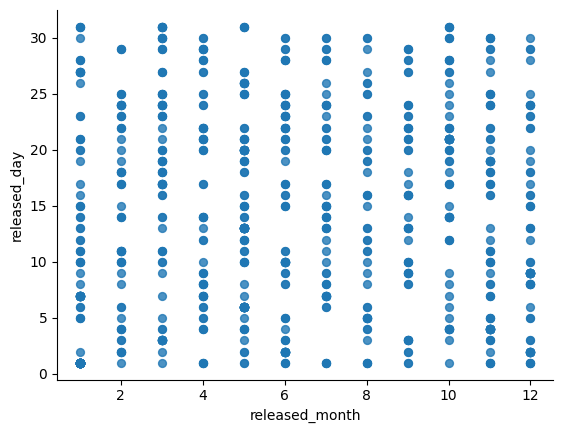

In [36]:
data.plot(kind='scatter', x='released_month', y='released_day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

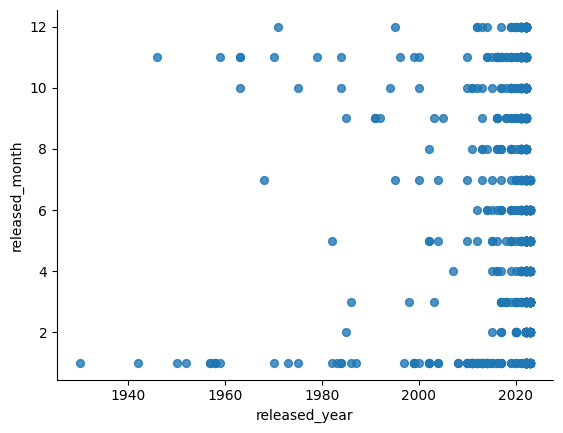

In [35]:
data.plot(kind='scatter', x='released_year', y='released_month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

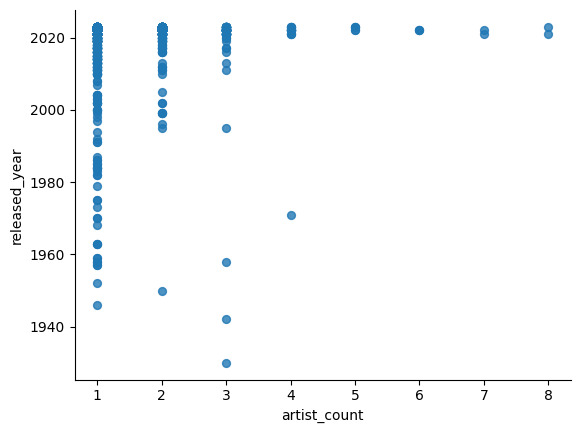

In [34]:
data.plot(kind='scatter', x='artist_count', y='released_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

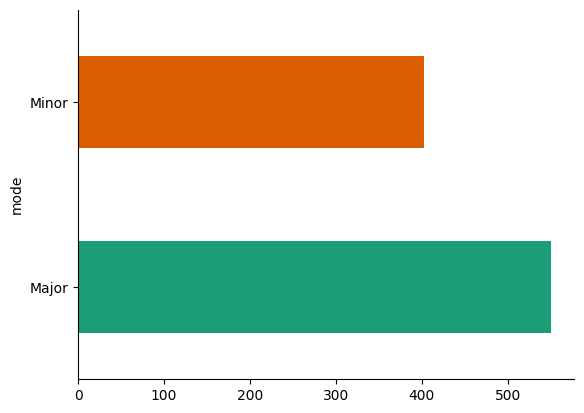

In [33]:
data.groupby('mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
min_value = data['released_year'].min()
print("Минимальное значение в столбце:", min_value)

Минимальное значение в столбце: 1930


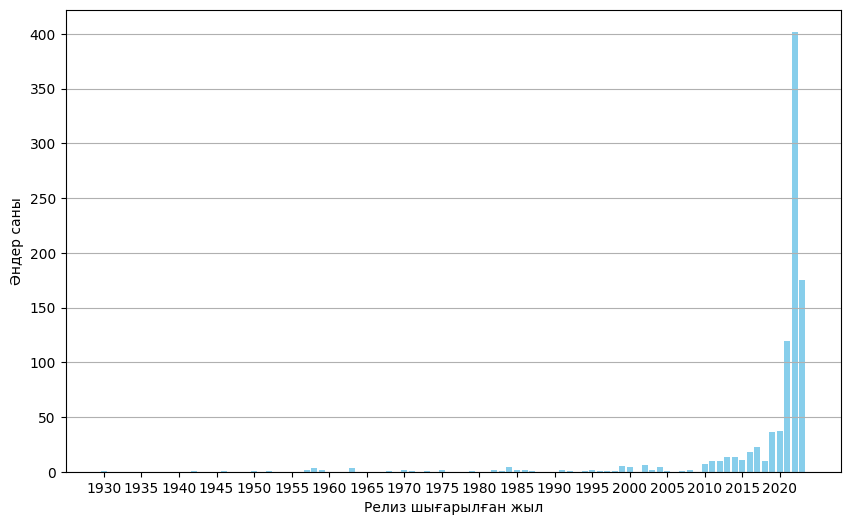

In [20]:
songs_per_year = data.groupby('released_year').size().reset_index(name='count_of_songs')

plt.figure(figsize=(10, 6))
plt.bar(songs_per_year['released_year'], songs_per_year['count_of_songs'], color='skyblue')
plt.xlabel('Релиз шығарылған жыл')
plt.ylabel('Әндер саны')

plt.xticks(np.arange(min(songs_per_year['released_year']), max(songs_per_year['released_year'])+1, 5))

plt.grid(axis='y')

plt.show()

In [3]:
spotify_counts = data['in_spotify_charts'].sum()
apple_counts = data['in_apple_charts'].sum()
deezer_counts = data['in_deezer_charts'].sum()

platforms = ['Spotify', 'Apple Music', 'Deezer']
counts = [spotify_counts, apple_counts, deezer_counts]

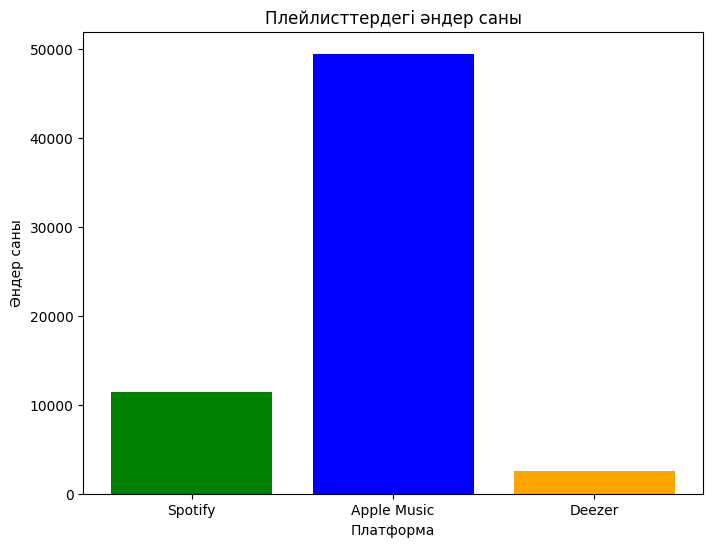

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(platforms, counts, color=['green', 'blue', 'orange'])
plt.title('Плейлисттердегі әндер саны')
plt.xlabel('Платформа')
plt.ylabel('Әндер саны')
plt.show()

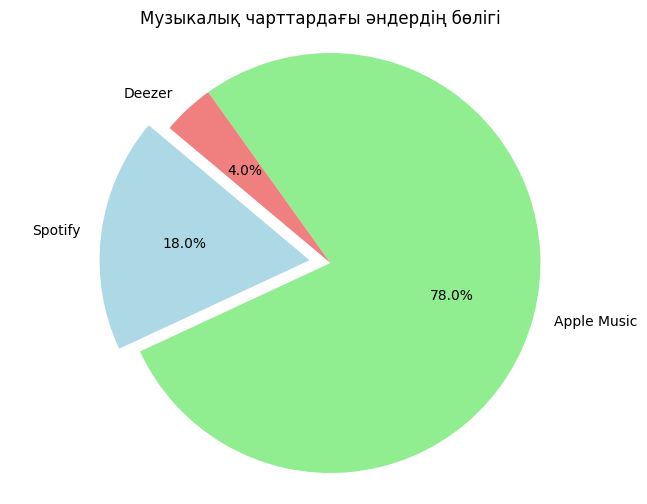

In [22]:
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=platforms, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Музыкалық чарттардағы әндердің бөлігі')
plt.axis('equal')
plt.show()

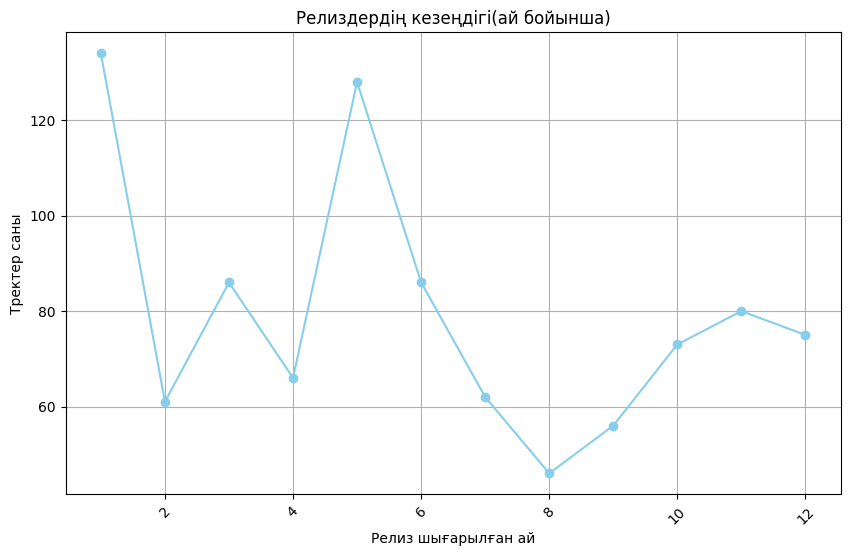

In [10]:
monthly_releases = data.groupby(data['released_month'])['track_name'].count()

plt.figure(figsize=(10, 6))
monthly_releases.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Релиз шығарылған ай')
plt.ylabel('Тректер саны')
plt.title('Релиздердің кезеңдігі(ай бойынша)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

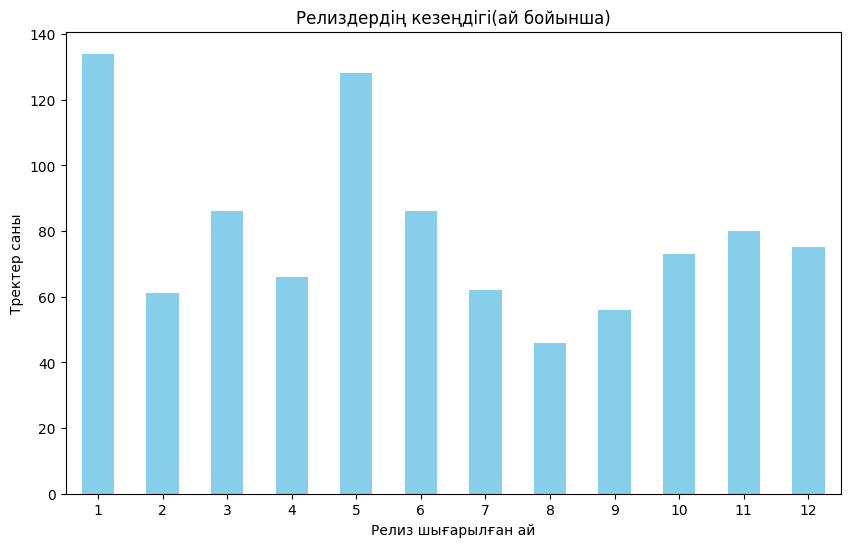

In [11]:
songs_by_month = data.groupby('released_month').size()

plt.figure(figsize=(10, 6))
songs_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Релиз шығарылған ай')
plt.ylabel('Тректер саны')
plt.title('Релиздердің кезеңдігі(ай бойынша)')
plt.xticks(rotation=0)
plt.show()

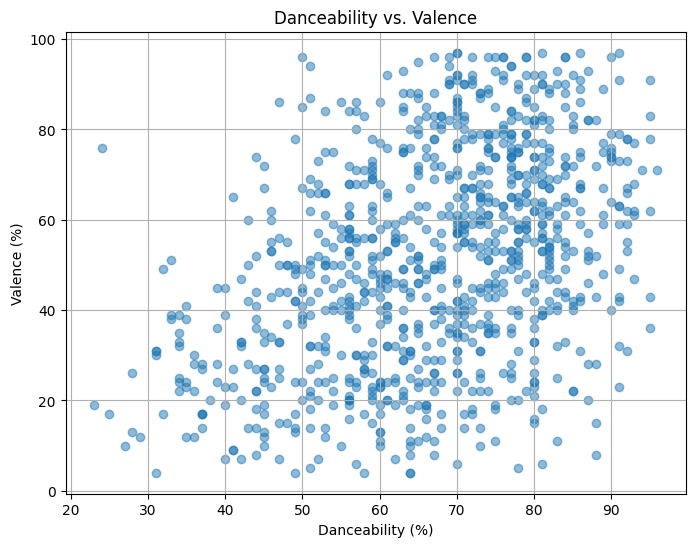

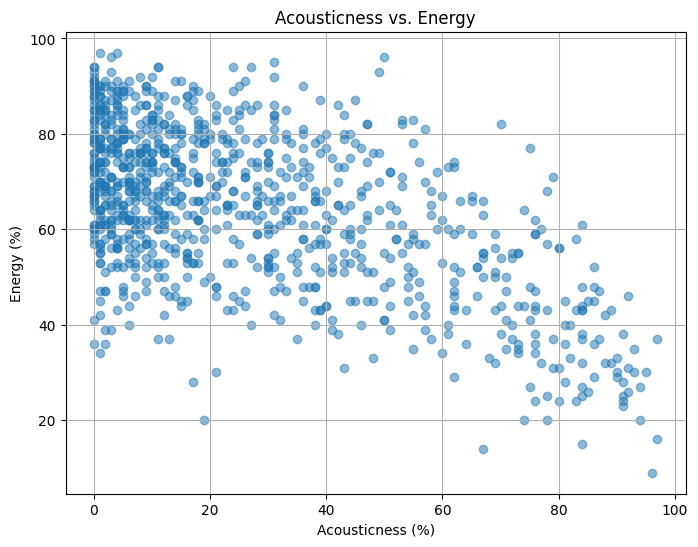

In [8]:
danceability = data['danceability_%']
valence = data['valence_%']
acousticness = data['acousticness_%']
energy = data['energy_%']

plt.figure(figsize=(8, 6))
plt.scatter(danceability, valence, alpha=0.5)
plt.title('Danceability vs. Valence')
plt.xlabel('Danceability (%)')
plt.ylabel('Valence (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(acousticness, energy, alpha=0.5)
plt.title('Acousticness vs. Energy')
plt.xlabel('Acousticness (%)')
plt.ylabel('Energy (%)')
plt.grid(True)
plt.show()

<ipython-input-41-fd57ca4f3fe1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data[features].corr()


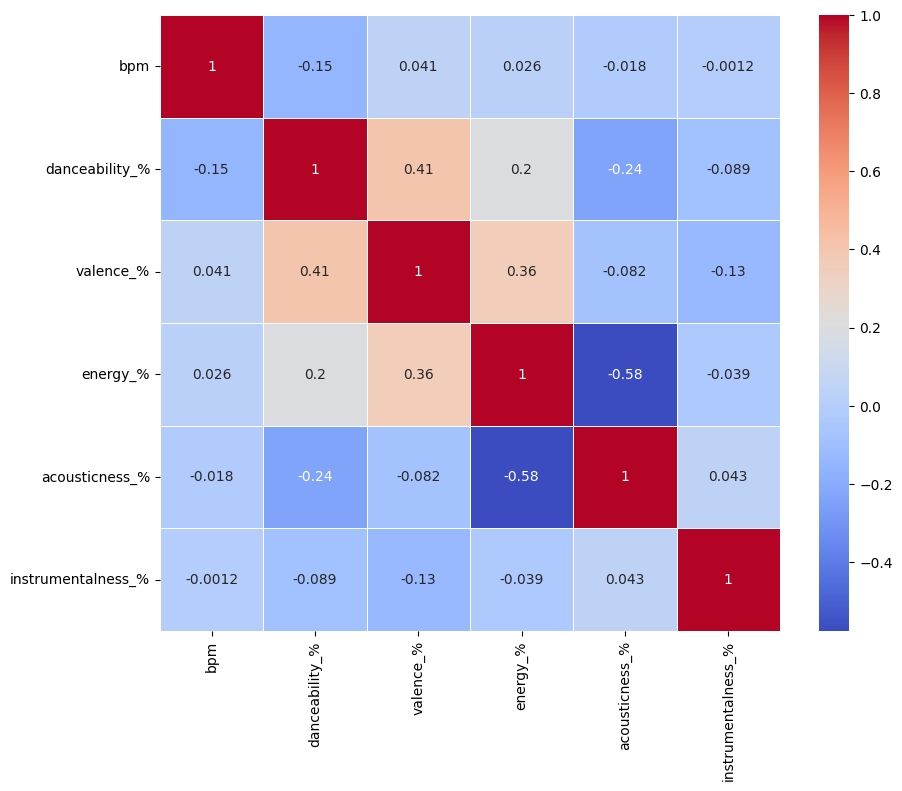

In [41]:
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'streams']
corr_matrix = data[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()